In [1]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
from numpy.linalg import inv
import random
import os

In [2]:
dataset_path = 'images/'
dataset_dir  = os.listdir(dataset_path)

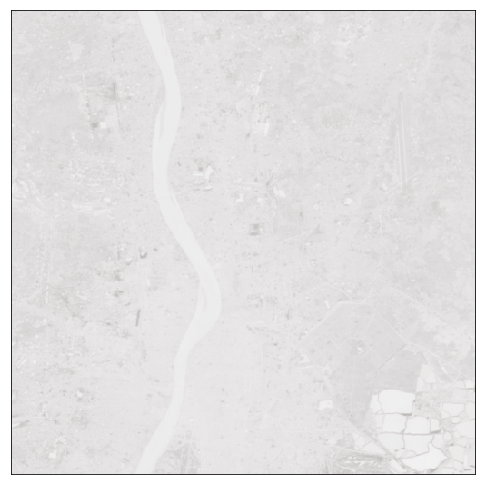

In [3]:
testing_tensor = np.ndarray(shape=(512,512,4), dtype=np.integer)

for i in range(4):
    img = plt.imread(dataset_path + str(i+1)+'.gif')
    # copying images to the training array
    testing_tensor[:,:,i] = np.array(img[:,:,0])

# plotting the training images
plt.subplot(1,1,1)
plt.imshow(testing_tensor)
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

# print(testing_tensor)

In [4]:
# testing for the points to take
# can be commented out later

# start coordinates, end coordinates
ranges_for_1_r = [[144,5,162,20],
                [156,27,170,50],
                 [166,111,180,130],
                 [159,148,171,166],
                  [174,224,187,239],
                 [183,242,199,255],
                 [207,280,219,296],
                 [206,338,219,351],
                 [217,311,228,328],
                 [163,455,175,466]]
ranges_for_1_nr = [[43,82,137,183],
               [36,226,151,323],
               [25,374,156,460],
                  [205,16,321,163],
                  [364,15,487,121],
                  [211,185,334,260],
                  [365,144,496,266],
                  [248,275,397,385],
                  [409,297,499,495],
                  [210,404,387,492]]

coords_1_r=[]
coords_1_nr=[]

for i in range(len(ranges_for_1_r)):
    for x in range(ranges_for_1_r[i][0],ranges_for_1_r[i][2]+1):
        for y in range(ranges_for_1_r[i][1],ranges_for_1_r[i][3]+1):
            coords_1_r.append([x,y])

for i in range(len(ranges_for_1_nr)):
    for x in range(ranges_for_1_nr[i][0],ranges_for_1_nr[i][2]+1):
        for y in range(ranges_for_1_nr[i][1],ranges_for_1_nr[i][3]+1):
            coords_1_nr.append([x,y])
    
random.shuffle(coords_1_r)
random.shuffle(coords_1_nr)

In [5]:
# sample points

#river
# sp_x_r = np.array(coords_1_r)[0:50,0]
# sp_y_r = np.array(coords_1_r)[0:50,1]
# sp_x_r = [167,186,176,158,167,217,226,218,169,161,171,210,163,160,186,155,158,218,
#           186,183,168,217,160,148,145,224,168,228,196,146,152,178,210,177,161,176,
#           156,212,166,162,158,165,162,166,218,212,186,172,166,220]
sp_x_r = [159,158,153,154,163,167,171,217,160,213,173,163,185,216,159,162,186,170,
          150,159,186,211,164,218,228,156,179,151,173,145,185,186,181,213,159,208,
          158,191,224,218,178,170,183,171,218,214,218,151,158,225]

# sp_y_r = [154,253,227,32,113,323,326,288,157,32,150,291,462,45,246,19,35,324,
#           255,224,164,350,148,7,12,325,465,326,251,16,13,126,342,124,47,111,
#           34,284,48,164,45,157,43,166,348,347,250,457,125,315]
sp_y_r = [6,38,16,7,30,129,166,292,32,287,127,159,254,286,156,156,233,461,
          12,45,229,347,47,324,322,16,120,6,457,19,233,232,228,282,18,292,
          20,247,314,344,120,34,233,128,351,287,280,7,9,313]

# #non-river
# sp_x_nr = np.array(coords_1_nr)[0:100,0]
# sp_y_nr = np.array(coords_1_nr)[0:100,1]
# sp_x_nr = [32,52,348,485,231,123,343,234,435,372,325,141,263,248,72,237,283,492,
#            132,86,116,224,298,479,238,259,431,461,411,277,388,206,469,392,129,371,
#            108,426,111,424,415,426,101,124,398,45,476,78,268,335,372,124,304,58,
#            357,338,270,440,310,281,428,222,468,417,332,321,469,443,410,410,441,68,
#            235,460,463,375,68,454,314,316,274,101,114,362,390,257,324,292,474,455,
#            468,455,473,230,413,360,55,313,418,488]
sp_x_nr = [230,216,489,311,120,137,417,302,89,427,369,88,79,476,70,316,48,394,
           32,448,416,360,287,91,31,293,92,418,68,344,428,55,294,53,380,371,
           486,238,446,131,125,308,312,311,275,359,132,210,457,246,299,360,421,493,
           236,375,392,48,478,254,427,57,445,448,50,404,392,424,451,379,359,269,
           147,412,236,337,232,362,479,475,306,91,462,275,468,102,306,237,338,405,
           264,410,220,106,389,110,247,391,63,433]

# sp_y_nr = [436,252,476,307,93,116,490,468,400,452,307,309,35,301,450,148,41,450,
#            295,452,312,211,36,430,56,51,446,490,29,480,99,55,408,91,126,175,
#            401,483,142,410,189,302,268,112,121,432,221,260,348,412,159,406,220,446,
#            307,476,144,416,96,246,24,185,90,235,252,440,52,116,388,104,62,128,
#            161,480,422,287,130,318,143,357,93,440,279,303,58,224,347,74,35,452,
#            56,458,463,60,306,334,145,470,40,184]
sp_y_nr = [83,214,163,85,402,430,307,49,436,425,244,374,227,43,296,70,118,366,
           411,215,113,333,24,235,383,109,402,444,261,420,245,438,149,416,245,66,
           18,55,411,226,271,100,336,208,253,444,387,123,340,108,334,365,375,445,
           158,355,377,233,75,441,103,404,308,313,96,83,49,173,185,406,458,460,
           253,464,98,478,471,327,240,489,239,425,452,65,173,441,478,149,475,90,
           289,198,150,168,147,95,457,93,414,197]


In [6]:
# mean of river class
T1=[0,0,0,0]
a=np.ndarray(shape=(50,4))
for i in range(50):
    for j in range(4):
        T1[j] = T1[j] + testing_tensor[sp_x_r[i],sp_y_r[i],j]
    
for i in range(4):
    T1[i] = T1[i]/50

for i in range(50):
    a[i] = np.subtract(testing_tensor[sp_x_r[i],sp_y_r[i],:],T1)

a.shape

(50, 4)

In [7]:
# mean of non-river class
T2=[0,0,0,0]
b=np.ndarray(shape=(100,4), dtype=np.float64)

for i in range(50):
    for j in range(4):
        T2[j] = T2[j] + testing_tensor[sp_x_nr[i],sp_y_nr[i],j]
    
for i in range(4):
    T2[i] = T2[i]/100

for i in range(100):
    b[i] = np.subtract(testing_tensor[sp_x_nr[i],sp_y_nr[i],:],T2)

b.shape

(100, 4)

In [8]:
# covariance matrices

cov_r = np.ndarray(shape=(4, 4), dtype=np.float64)
cov_nr = np.ndarray(shape=(4, 4), dtype=np.float64)

for i in range(4):
    for j in range(4):
        cov_r[i][j]=np.dot(a[:,i],a[:,j])/50
        
print('Covariance of River class')
print(cov_r)

for i in range(4):
    for j in range(4):
        cov_nr[i][j]=np.dot(b[:,i],b[:,j])/100
print('\nCovariance of Non-river class')
print(cov_nr)


Covariance of River class
[[ 4.3364  4.1016  5.9504 -1.7028]
 [ 4.1016  4.9104  6.8576 -0.6232]
 [ 5.9504  6.8576 15.5344  2.5592]
 [-1.7028 -0.6232  2.5592 34.3556]]

Covariance of Non-river class
[[428.9365 274.1024 287.411  342.1848]
 [274.1024 176.514  185.2758 220.6846]
 [287.411  185.2758 199.5955 229.6561]
 [342.1848 220.6846 229.6561 307.1759]]


## Testing

In [9]:

inverse_cov_r = inv(cov_r)
inverse_cov_nr = inv(cov_nr)

In [10]:
def cal(i,j):
    r = np.subtract(testing_tensor[i,j,:],T1)
    nr = np.subtract(testing_tensor[i,j,:],T2)

    river_class = np.dot(np.dot(r.T,inverse_cov_r), r)
    non_river_class = np.dot(np.dot(nr.T,inverse_cov_nr), nr)
    
    # density functions

    det_cov_r = np.linalg.det(cov_r)
    p1 = (-0.5) * 1/np.sqrt(det_cov_r) * np.exp(river_class);

    det_cov_nr = np.linalg.det(cov_nr)
    p2 = (-0.5) * 1/np.sqrt(det_cov_nr) * np.exp(non_river_class);
    return p1,p2
    

In [11]:
def bayes(P1, P2):
    out_image=np.ndarray(shape=(512, 512), dtype = np.integer)
    for i in range(512):
        for j in range(512):
            p1,p2 = cal(i,j)
            if((P1 * p1) >= (P2 * p2)):
                out_image[i,j]=255
            else:
                out_image[i,j]=0
                
    return out_image

In [12]:
sample_out_img = plt.imread(dataset_path + 'PDCV1.jpeg')

## P1=0.3, P2=0.7

Accuracy 89.82391357421875 %


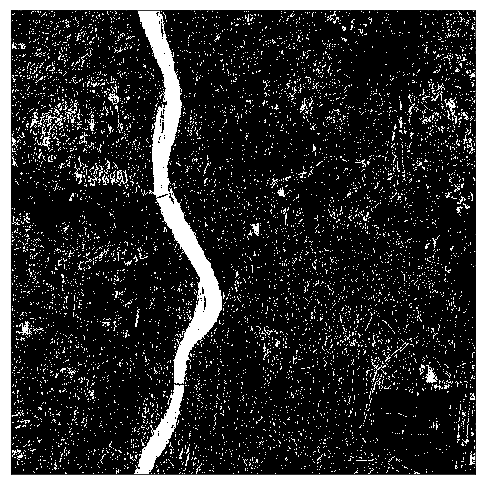

In [13]:
out_image1 = bayes(P1=0.3,P2=0.7)

count=0
for i in range(512):
    for j in range(512):
        if sample_out_img[i,j]==out_image1[i,j]:
            count = count+1
print('Accuracy',count*100/(512*512),'%')

plt.subplot(1,1,1)
plt.imshow(out_image1, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

# P1=0.5, P2=0.5

Accuracy 94.63119506835938 %


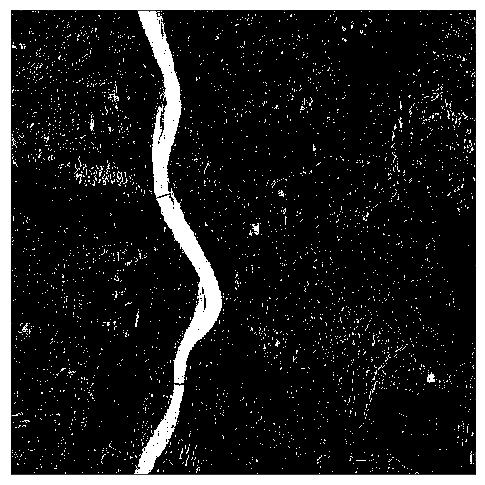

In [14]:
out_image2 = bayes(P1=0.5,P2=0.5)

count=0
for i in range(512):
    for j in range(512):
        if sample_out_img[i,j]==out_image2[i,j]:
            count = count+1
print('Accuracy',count*100/(512*512),'%')

plt.subplot(1,1,1)
plt.imshow(out_image2, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

# P1=0.7, P2=0.3

Accuracy 96.23222351074219 %


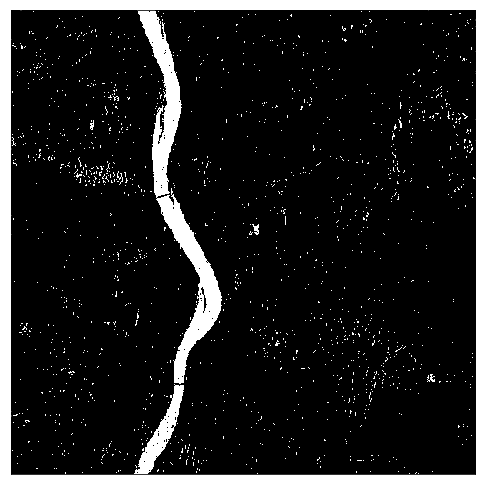

In [15]:
out_image3 = bayes(P1=0.7,P2=0.3)

count=0
for i in range(512):
    for j in range(512):
        if sample_out_img[i,j]==out_image3[i,j]:
            count = count+1
print('Accuracy',count*100/(512*512),'%')

plt.subplot(1,1,1)
plt.imshow(out_image3, cmap='gray')
plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.subplots_adjust(right=1.2, top=2.5)
plt.show()

## Accuracy vs P1

Accuracy for 0.0 : 2.5402069091796875 %
Accuracy for 0.1 : 58.00971984863281 %
Accuracy for 0.2 : 81.19049072265625 %
Accuracy for 0.3 : 89.82391357421875 %
Accuracy for 0.4 : 92.9962158203125 %
Accuracy for 0.5 : 94.63119506835938 %
Accuracy for 0.6 : 95.63369750976562 %
Accuracy for 0.7 : 96.23222351074219 %
Accuracy for 0.8 : 96.64535522460938 %
Accuracy for 0.9 : 96.92802429199219 %
Accuracy for 1.0 : 95.14427185058594 %


Text(0.5, 1.0, 'Accuracy vs. P1')

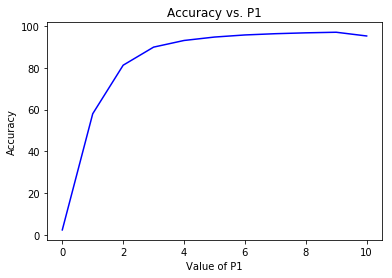

In [21]:
accuracy = np.zeros(11)
it=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for k,item in enumerate(it):
    x = bayes(P1=item,P2=(1-item))
    count=0
    for i in range(512):
        for j in range(512):
            if sample_out_img[i,j]==x[i,j]:
                count = count+1
    accuracy[k] = count*100/(512*512)
    print('Accuracy for',item,":",accuracy[k],'%')
    
fig, axi = plt.subplots()  
axi.plot(np.arange(11), accuracy, 'b')  
axi.set_xlabel('Value of P1')  
axi.set_ylabel('Accuracy')  
axi.set_title('Accuracy vs. P1') 